In [50]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, e
import scipy.stats as stats
import random

In [51]:
adult = pd.read_csv("adult_with_pii.csv")
adult.head()

,Name,DOB,SSN,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0
1,Brandise Tripony,6/7/1988,150-19-2766,61523,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35,0,0
2,Brenn McNeely,8/6/1991,725-59-9860,95668,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,32,0,0
3,Dorry Poter,4/6/2009,659-57-4974,25503,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,14,0,0
4,Dick Honnan,9/16/1951,220-93-3811,75387,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,72,0,0


In [52]:
def DE_p_q(epsilon, d):
    p = (e**epsilon) / (e**epsilon + d - 1)

    q = (1 - p) / (d - 1)

    return p, q

In [53]:
#case de mehcanism decides the response to be fake, ramdomly picks all the values but the truthful response of the domain
def random_pick_DE(domain, response):
    domain_q = [i for i in domain if i != response]

    return random.choice(domain_q)

In [54]:
def randomized_response_DE(epsilon, domain, response):
    d = len(domain)
    p, q = DE_p_q(epsilon, d)

    #generates the chance of the response
    sample = np.random.random()

    if sample <= p:
        return response
        
    else:
        return random_pick_DE(domain, response)

In [141]:
def aggregateDE(counts, pDE, qDE, n):

    counts_copy = counts.copy()
    
    for i in range(len(counts_copy)):
        a = 1.0 / (pDE - qDE)
        b = n * qDE / (pDE - qDE)
        counts_copy[i] = a * counts_copy[i] - b

    return counts_copy

In [142]:
#encodes the response into a vector with binary entrances
def encode(response, domain):
    return [1 if d == response else 0 for d in domain]

In [138]:
epsilon = 3
attribute = 'Occupation'
domain = adult[attribute].dropna().unique()
p, q = DE_p_q(epsilon, len(domain))

responses = [randomized_response_DE(epsilon, domain, r) for r in adult[attribute]]

countsDE = np.sum([encode(r, domain) for r in responses], axis = 0)

wtf = countsDE

countsDEagg = aggregateDE(wtf, p, q, len(adult[attribute]))

FUNC PRINT WOOOOOOOOOOOOOOOOOOOOOOOW
[3057 3207 1785 3261 2839 2922 3273 1785 1484 2050 1506 1383  971  944
 1020]
[3753 4021 1481 4117 3364 3512 4139 1481  944 1955  983  763   27  -20
  115]


In [143]:
def histogramerDE(attribute, epsilon):
    domain = adult[attribute].dropna().unique()
    p, q = DE_p_q(epsilon, len(domain))

    responses = [randomized_response_DE(epsilon, domain, r) for r in adult[attribute]]
    #countsDE1 = pd.Series(responses).value_counts()#pandas is shit
    countsDE = np.sum([encode(r, domain) for r in responses], axis = 0)
    countsDEagg = aggregateDE(countsDE, p, q, len(adult[attribute]))
    
    countsTruth = np.sum([encode(r, domain) for r in adult[attribute]], axis = 0)
    
    fig = plt.figure(figsize=(24, 6), facecolor='white')

    plt.subplot(1, 2, 1)
    
    plt.bar(domain, countsTruth, alpha=0.5, label='Truthful responses', align='center', color='green' , width = 0.98)
    plt.bar(domain, countsDE, alpha=0.5, label='DE responses', align='center', color='navy',  width = 0.98)

    plt.text(13.5, 3400, f'Budget = {epsilon}', horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel(attribute)
    plt.ylabel('Responses')
    plt.title('DE method')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.gca().spines['bottom'].set_visible(False)
    #plt.gca().spines['left'].set_visible(False)
    
    plt.minorticks_off()
    #plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
    plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='white')

    plt.subplot(1, 2, 2)
    
    plt.bar(domain, countsTruth, alpha=0.5, label='Truthful responses', align='center', color='green' , width = 0.98)
    plt.bar(domain, countsDEagg, alpha=0.5, label='DEagg responses', align='center', color='navy',  width = 0.98)

    plt.text(13.5, 3400, f'Budget = {epsilon}', horizontalalignment='right', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel(attribute)
    plt.ylabel('Responses')
    plt.title('DE method')
    plt.xticks(rotation=45)
    plt.legend()
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #plt.gca().spines['bottom'].set_visible(False)
    #plt.gca().spines['left'].set_visible(False)
    
    plt.minorticks_off()
    #plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
    plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='white')

    
    plt.show()

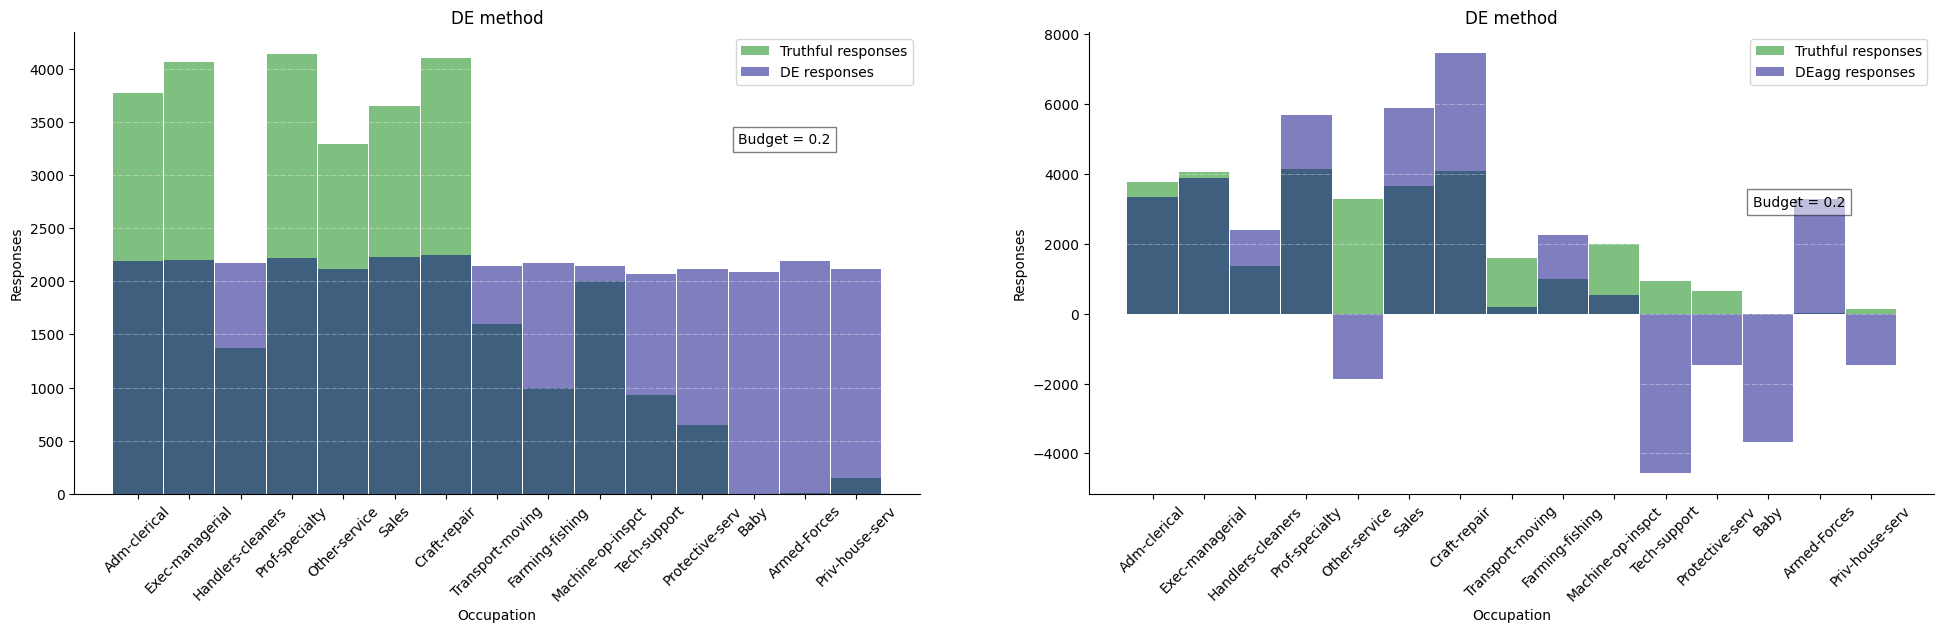

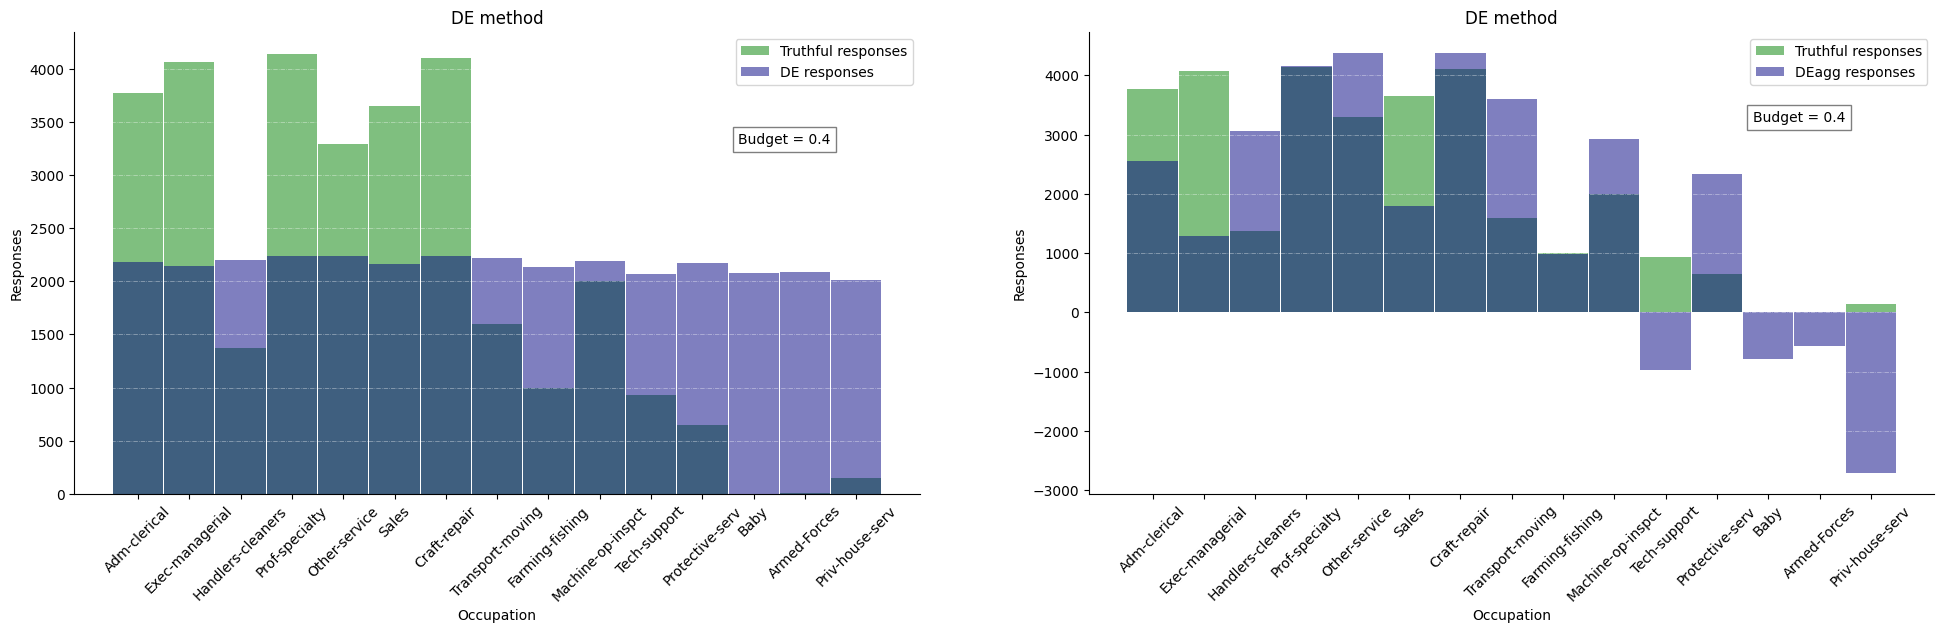

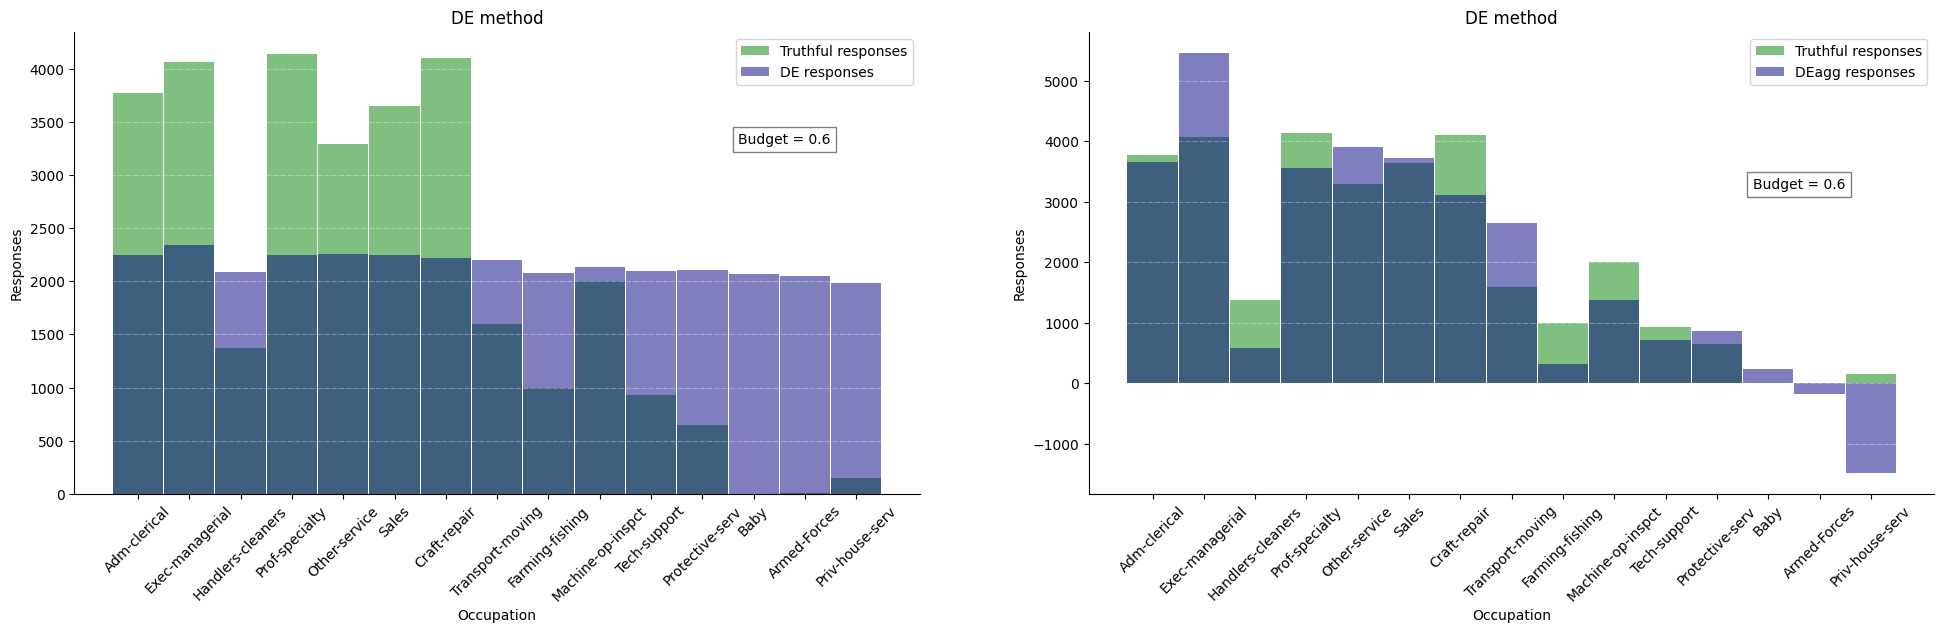

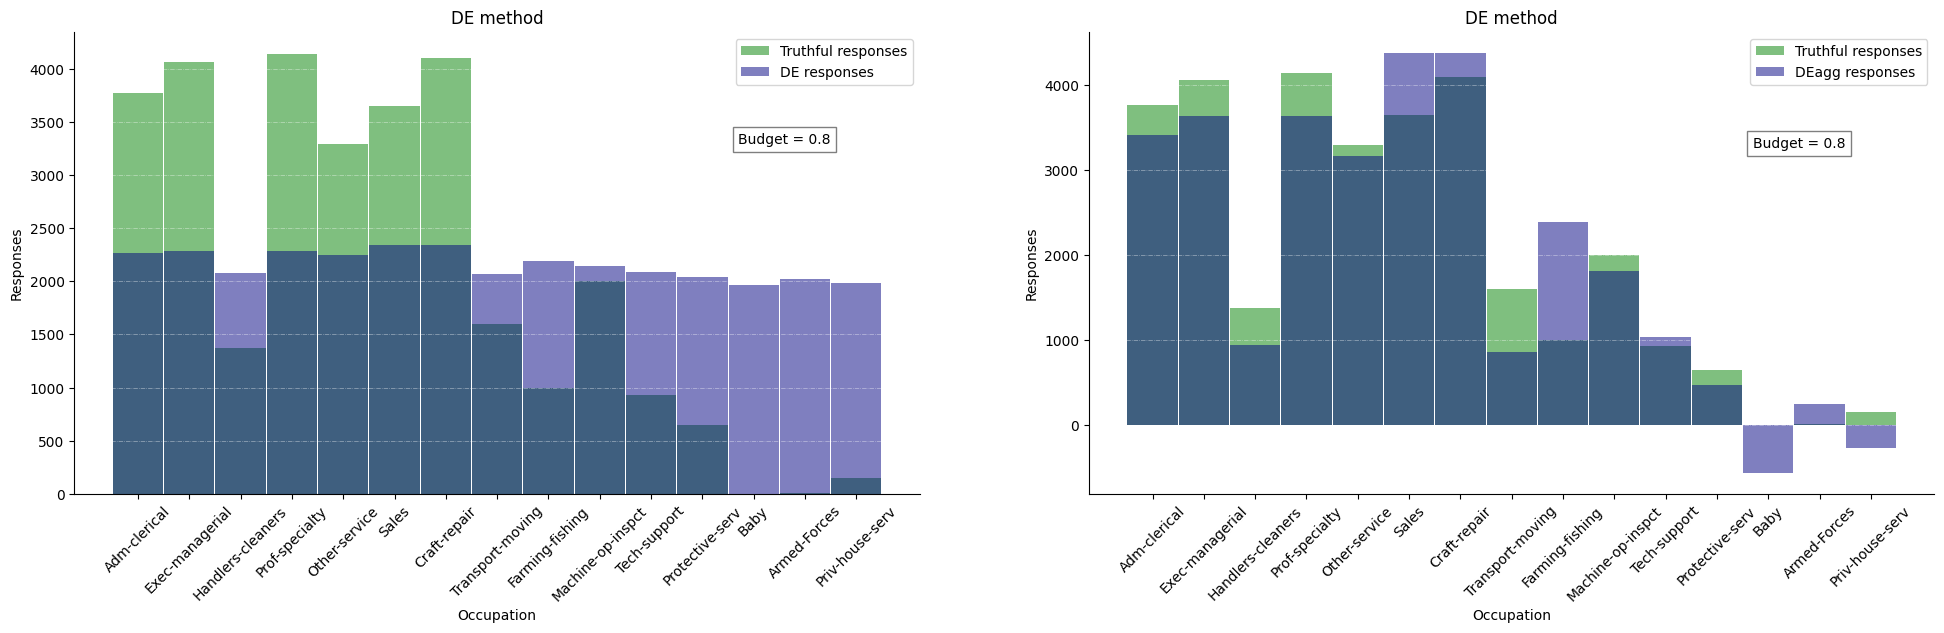

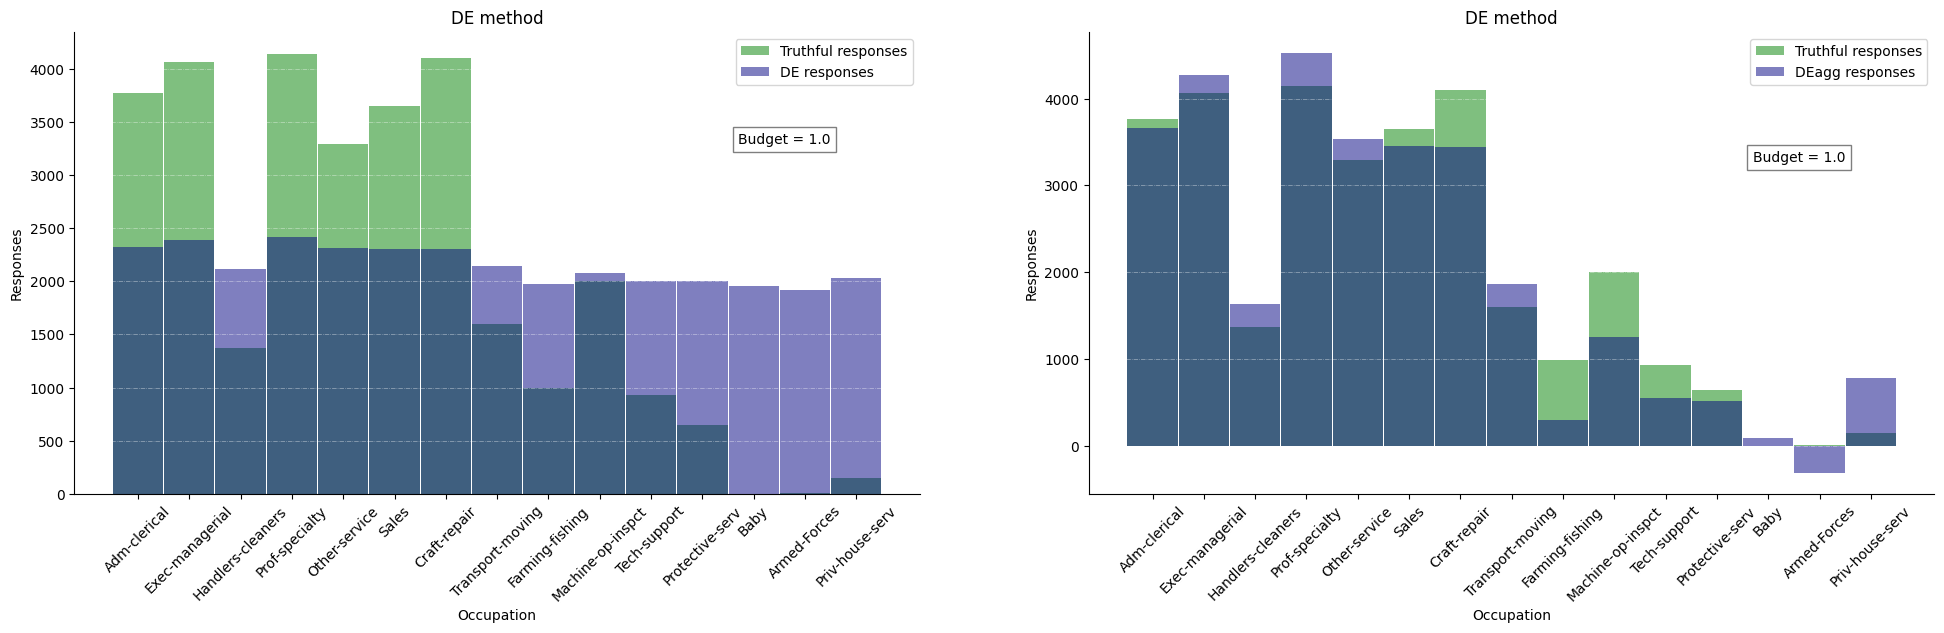

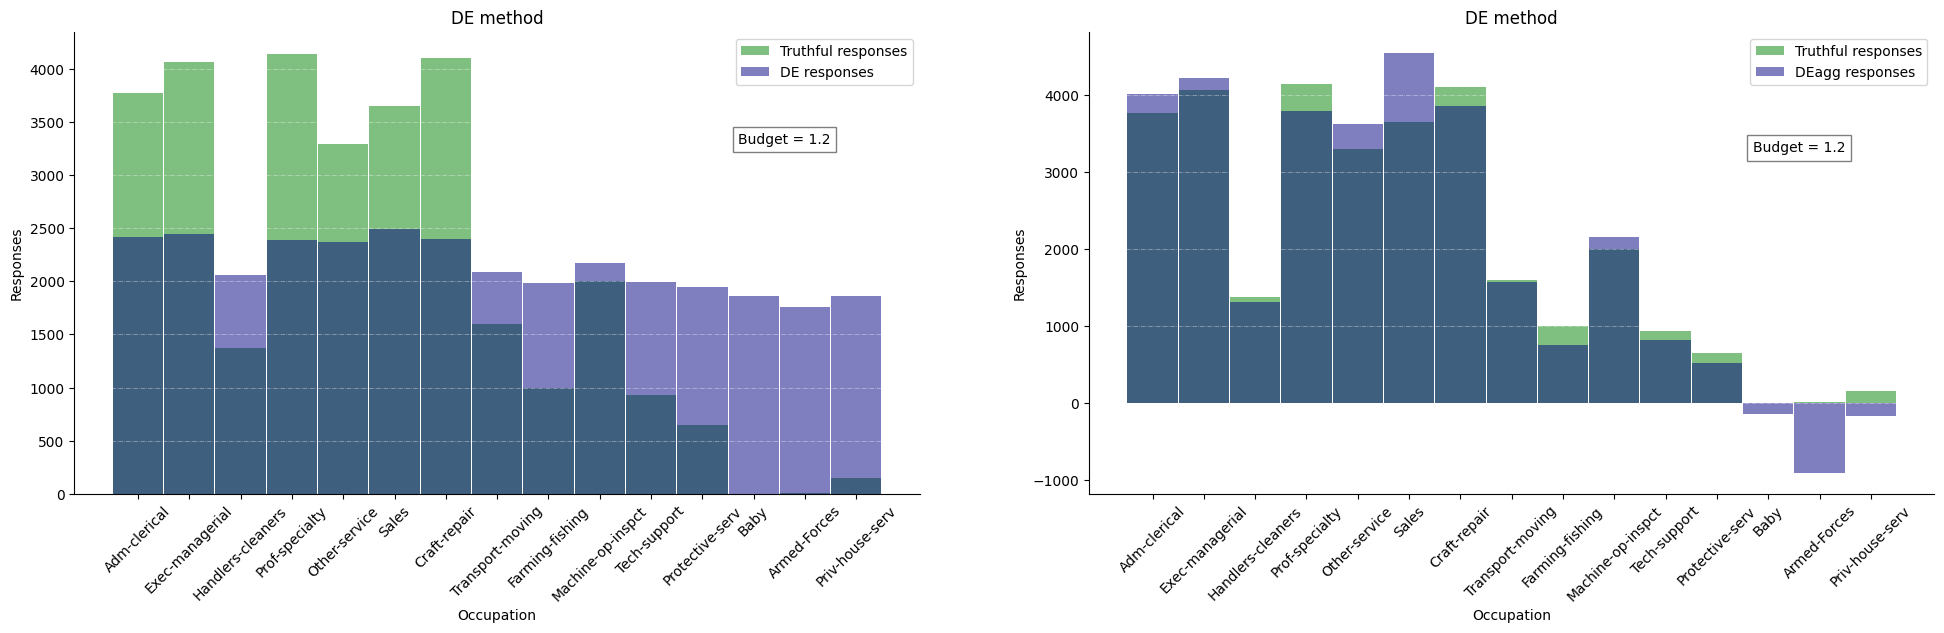

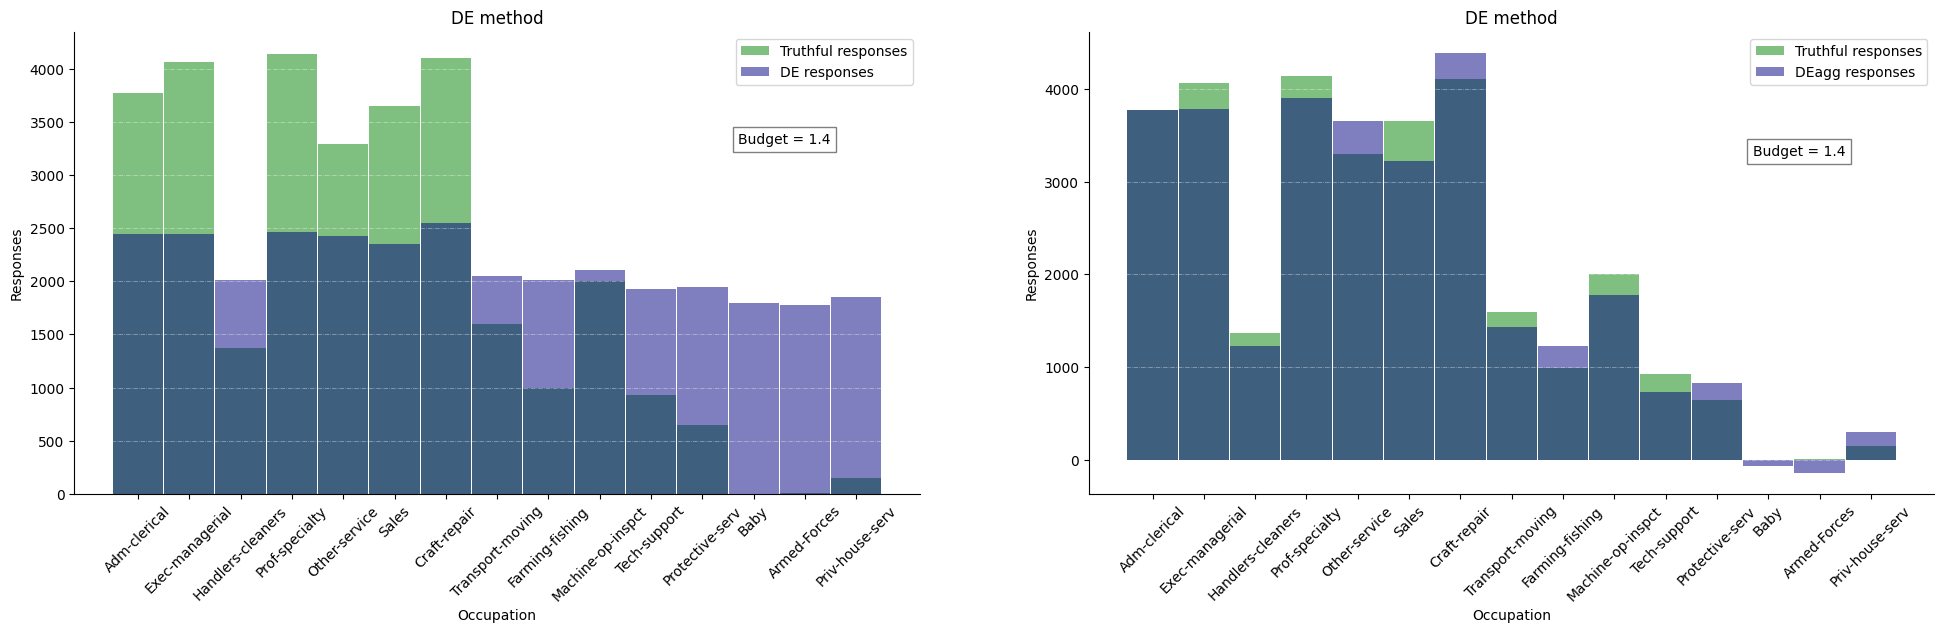

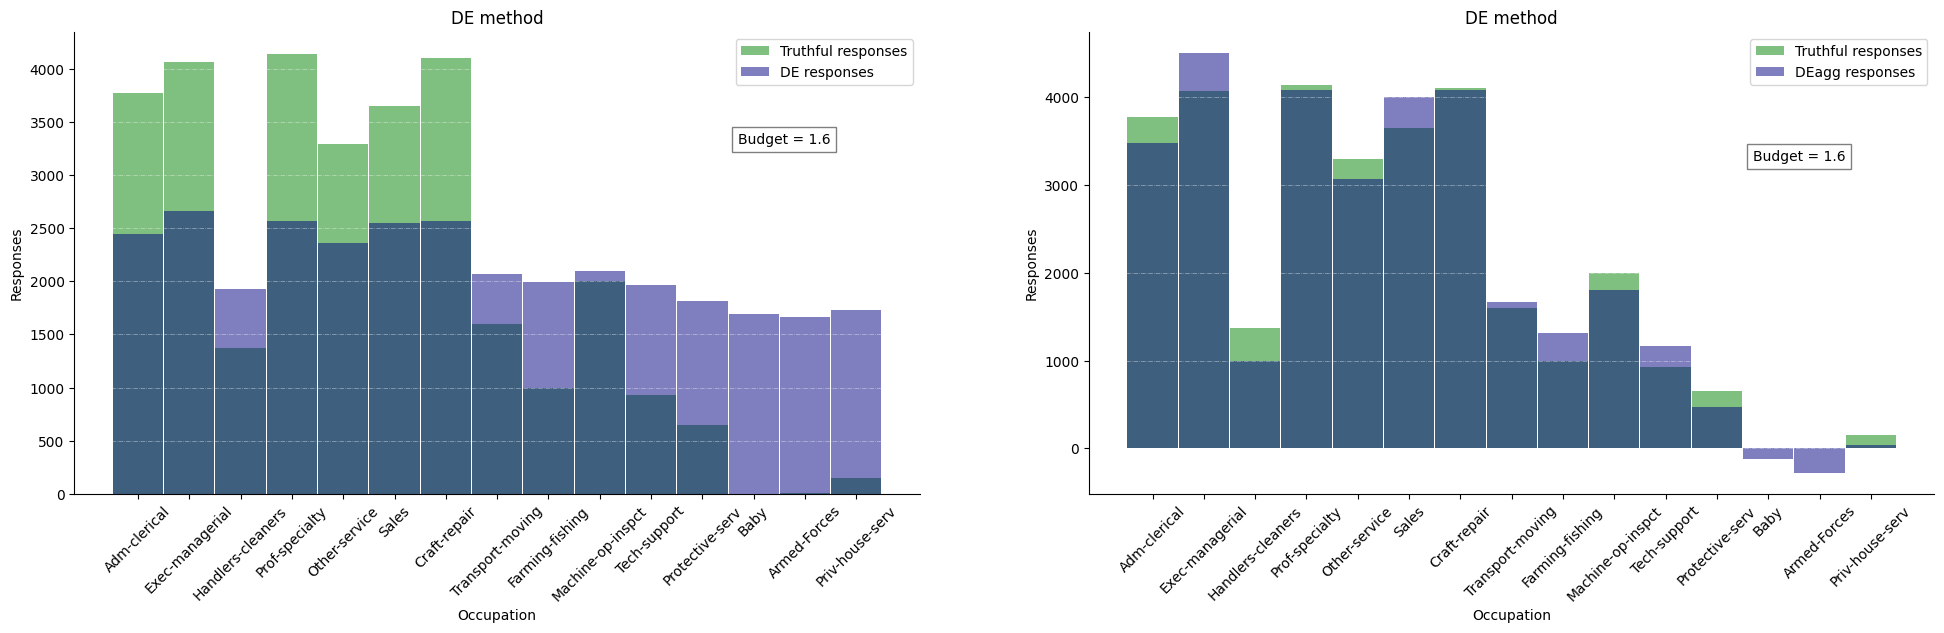

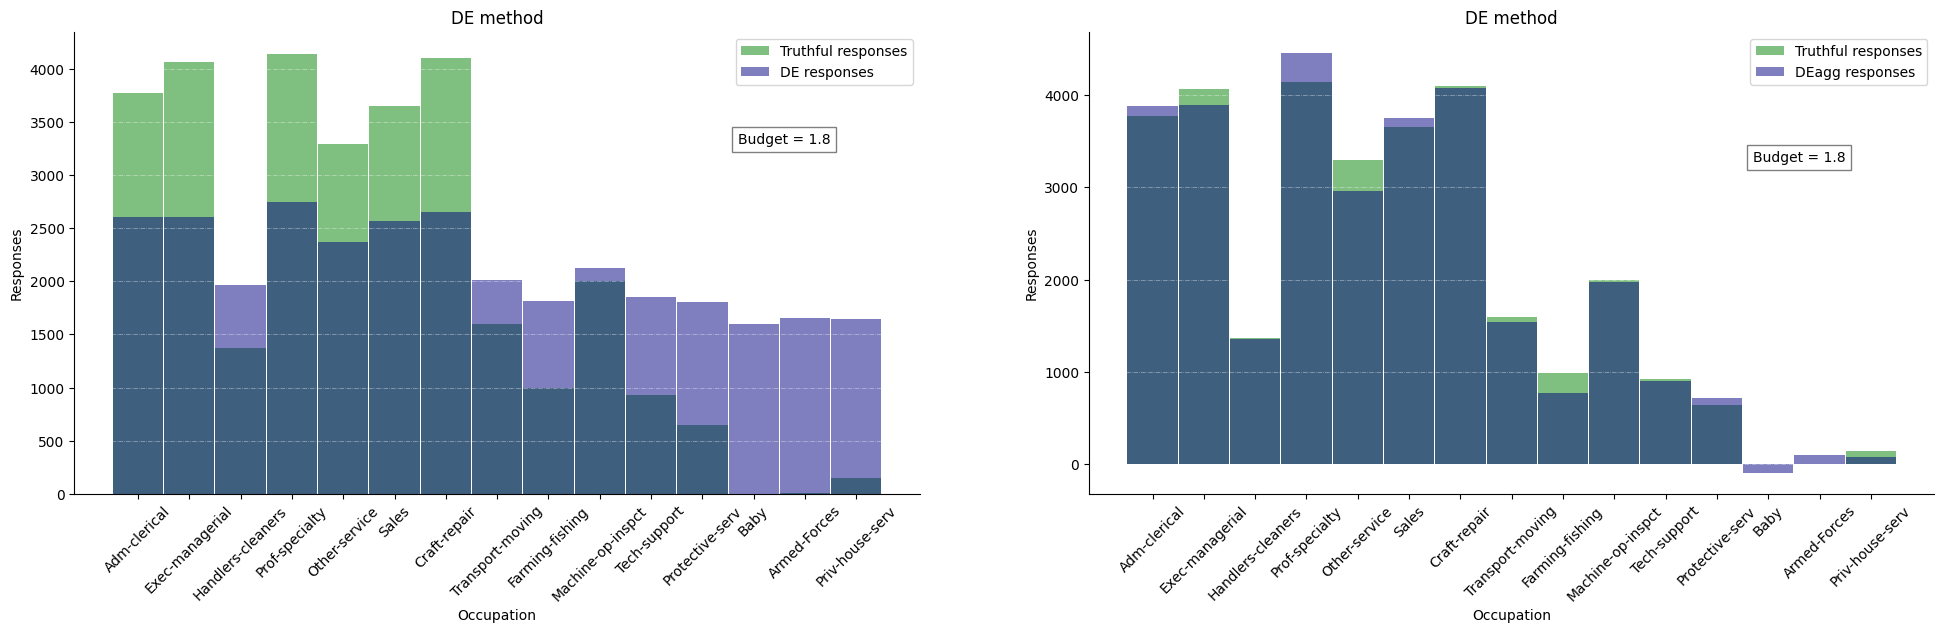

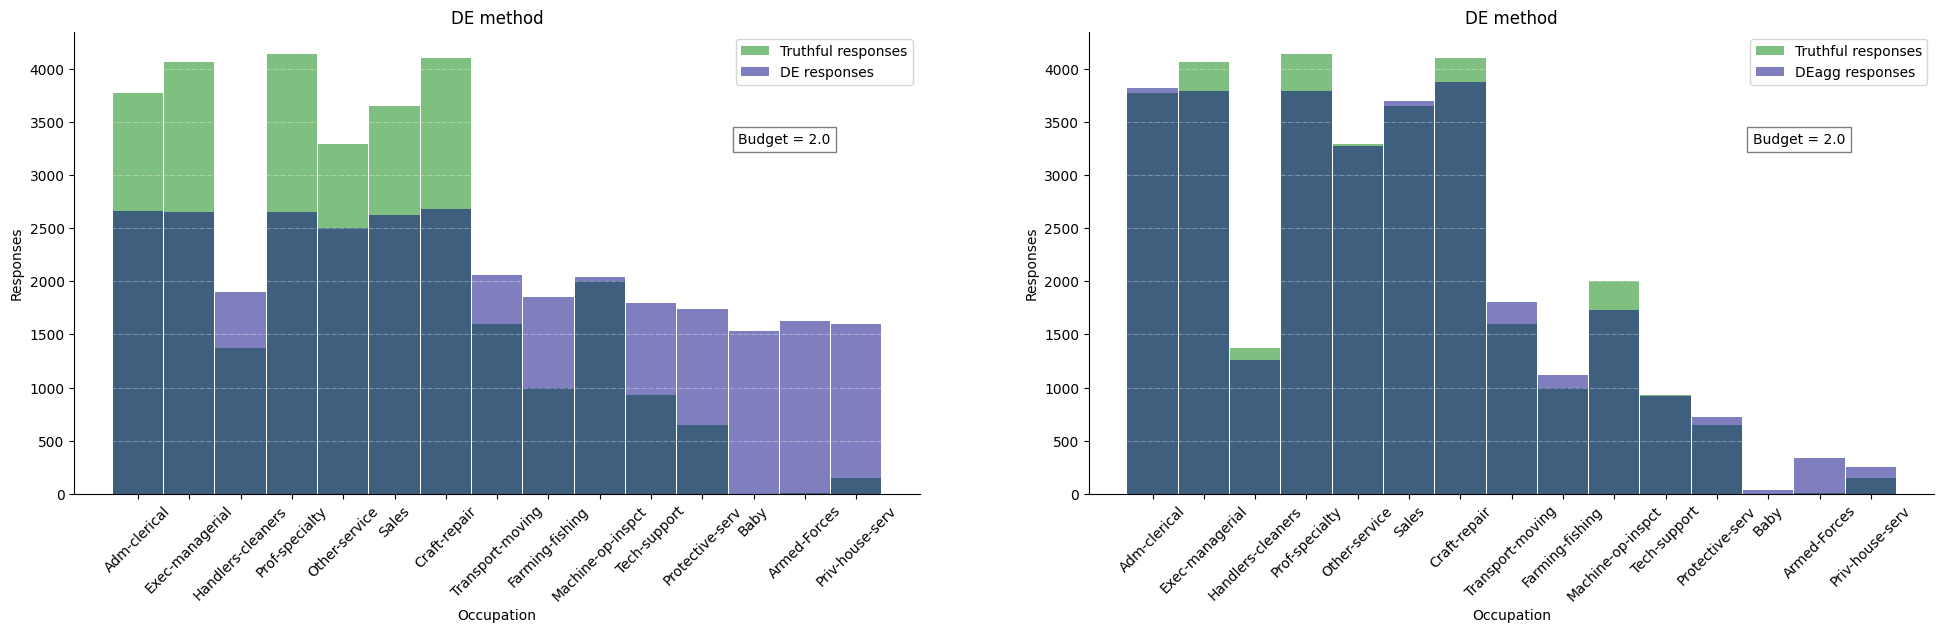

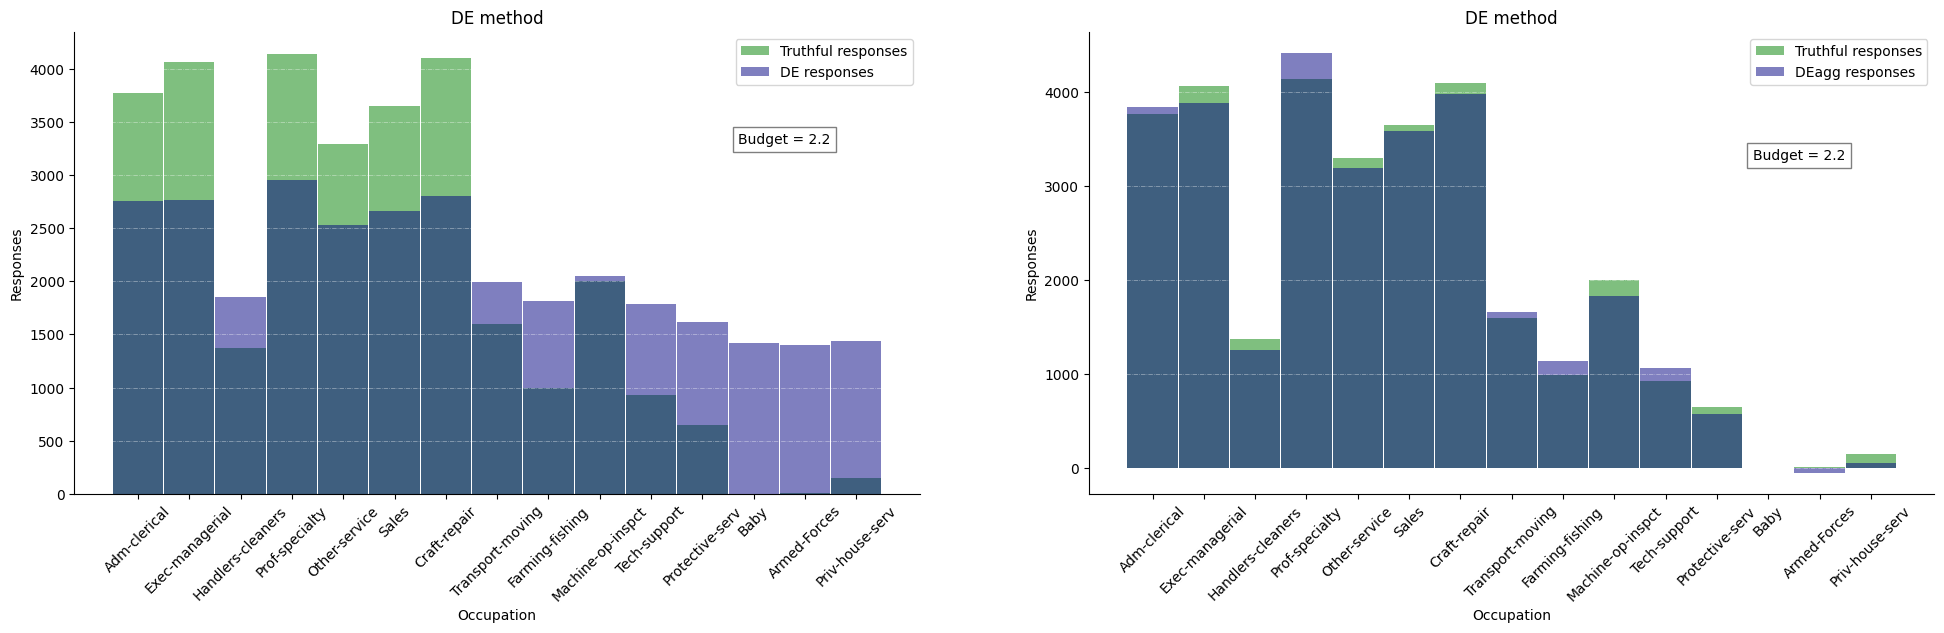

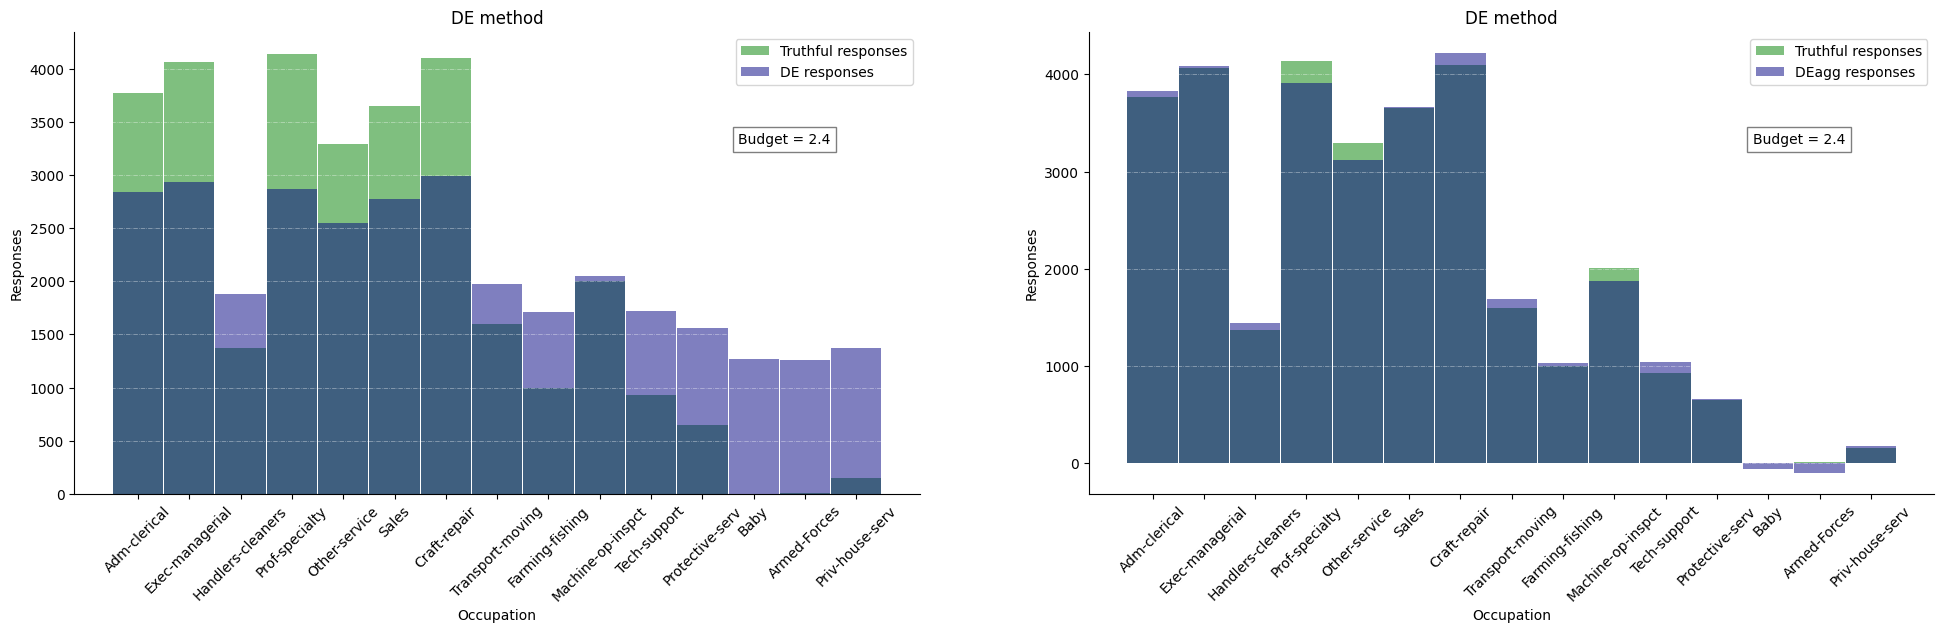

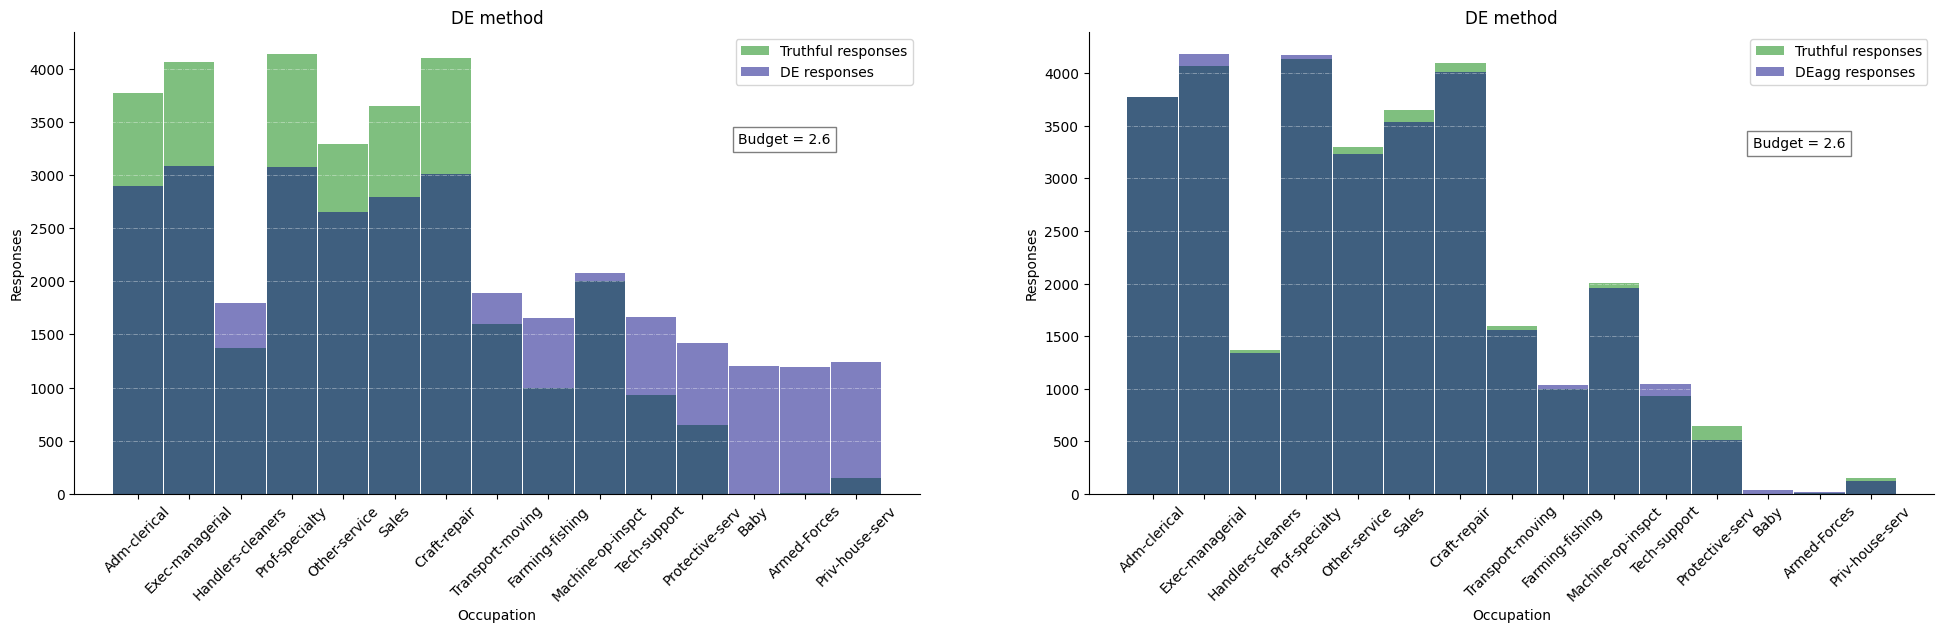

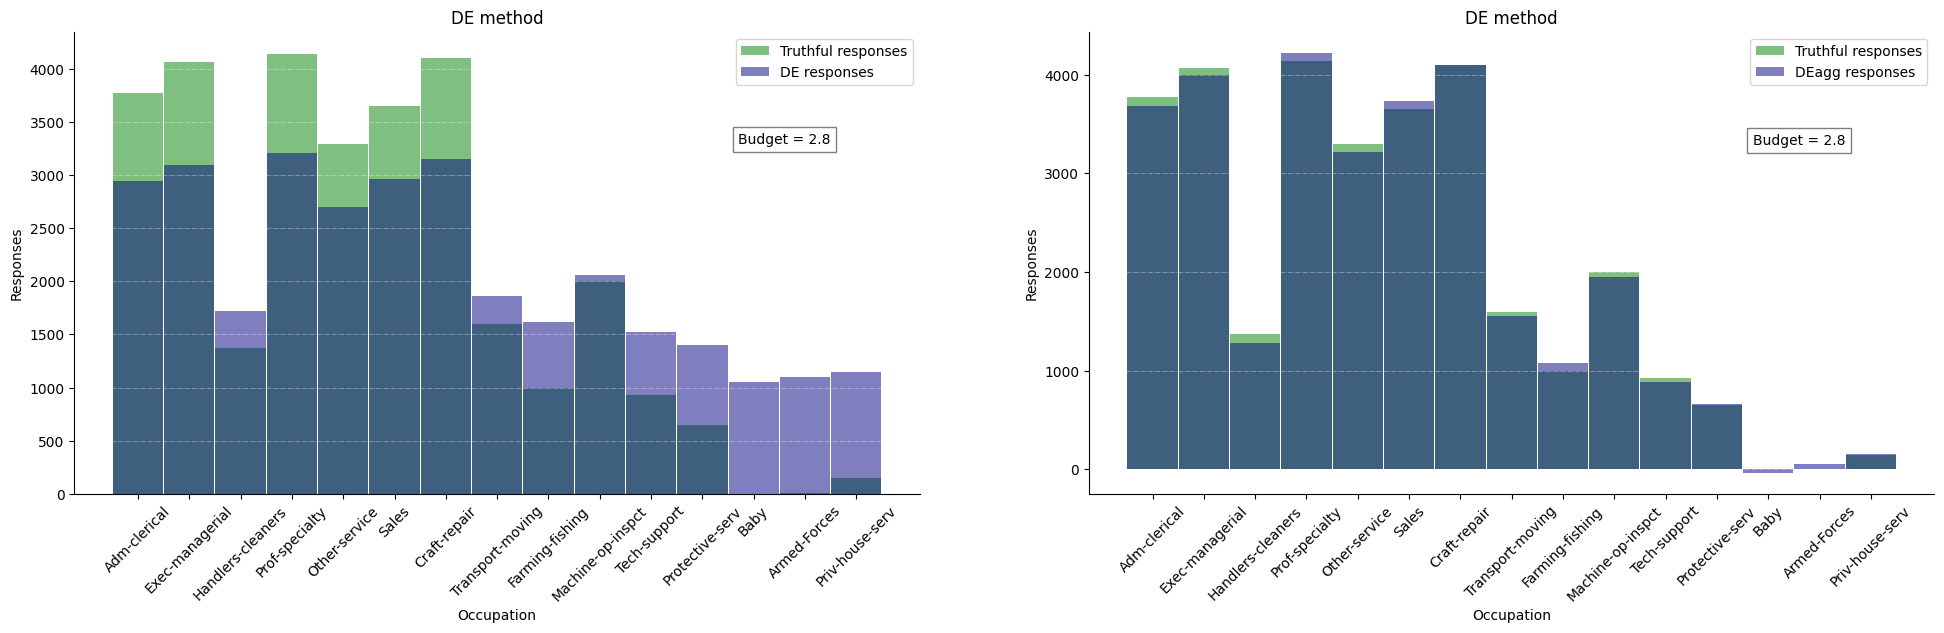

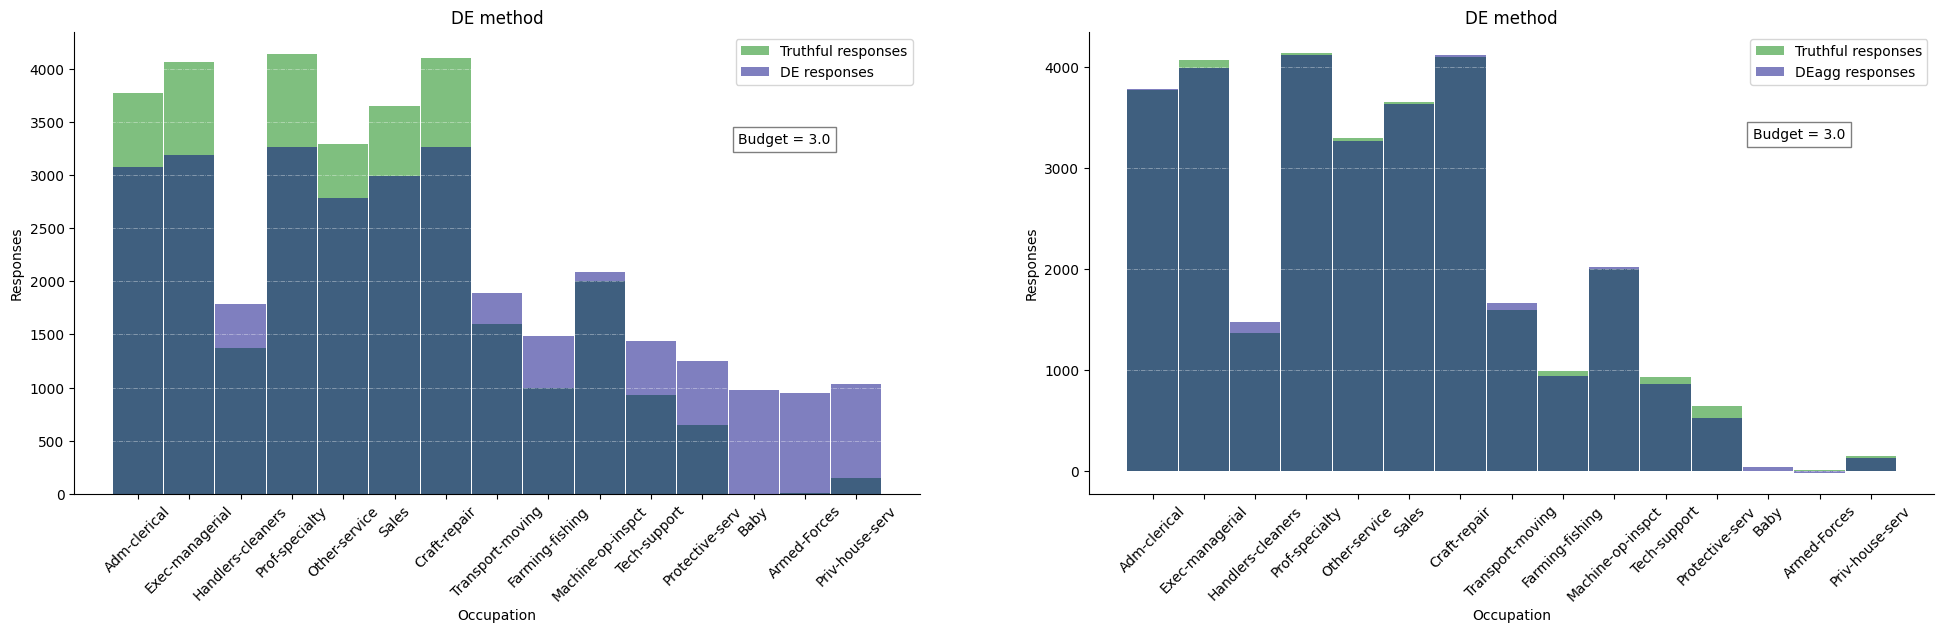

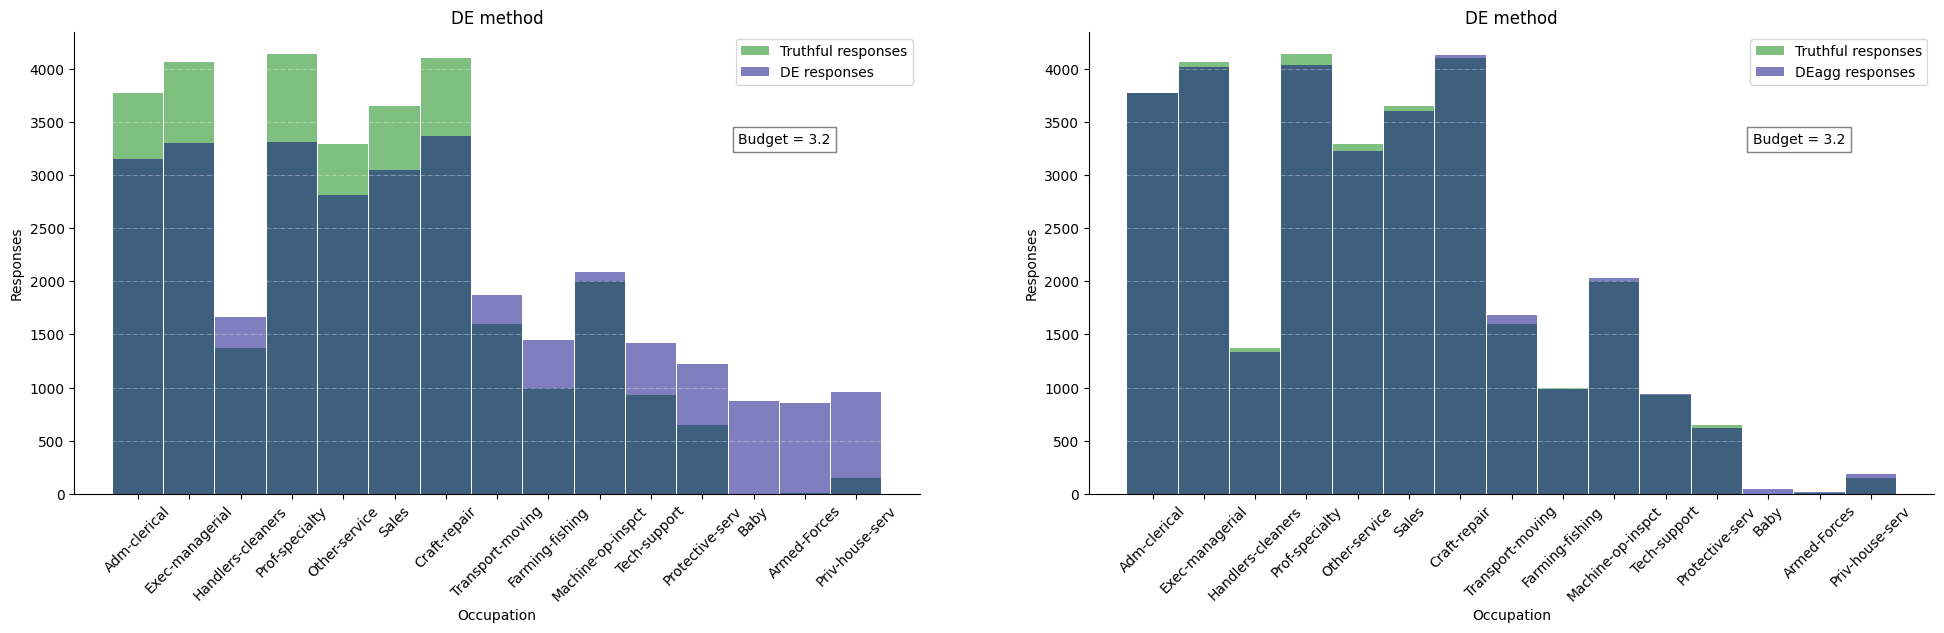

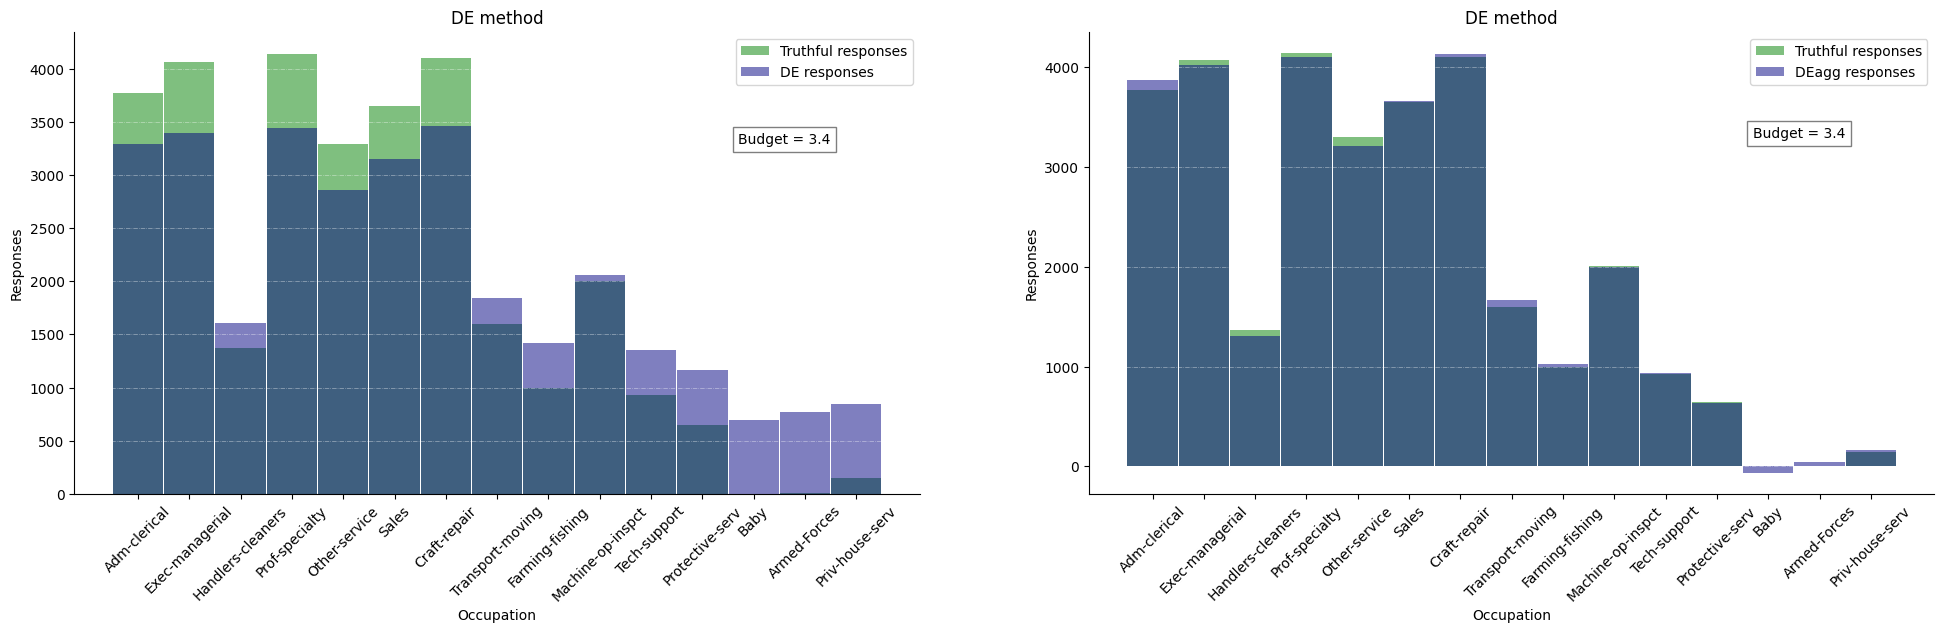

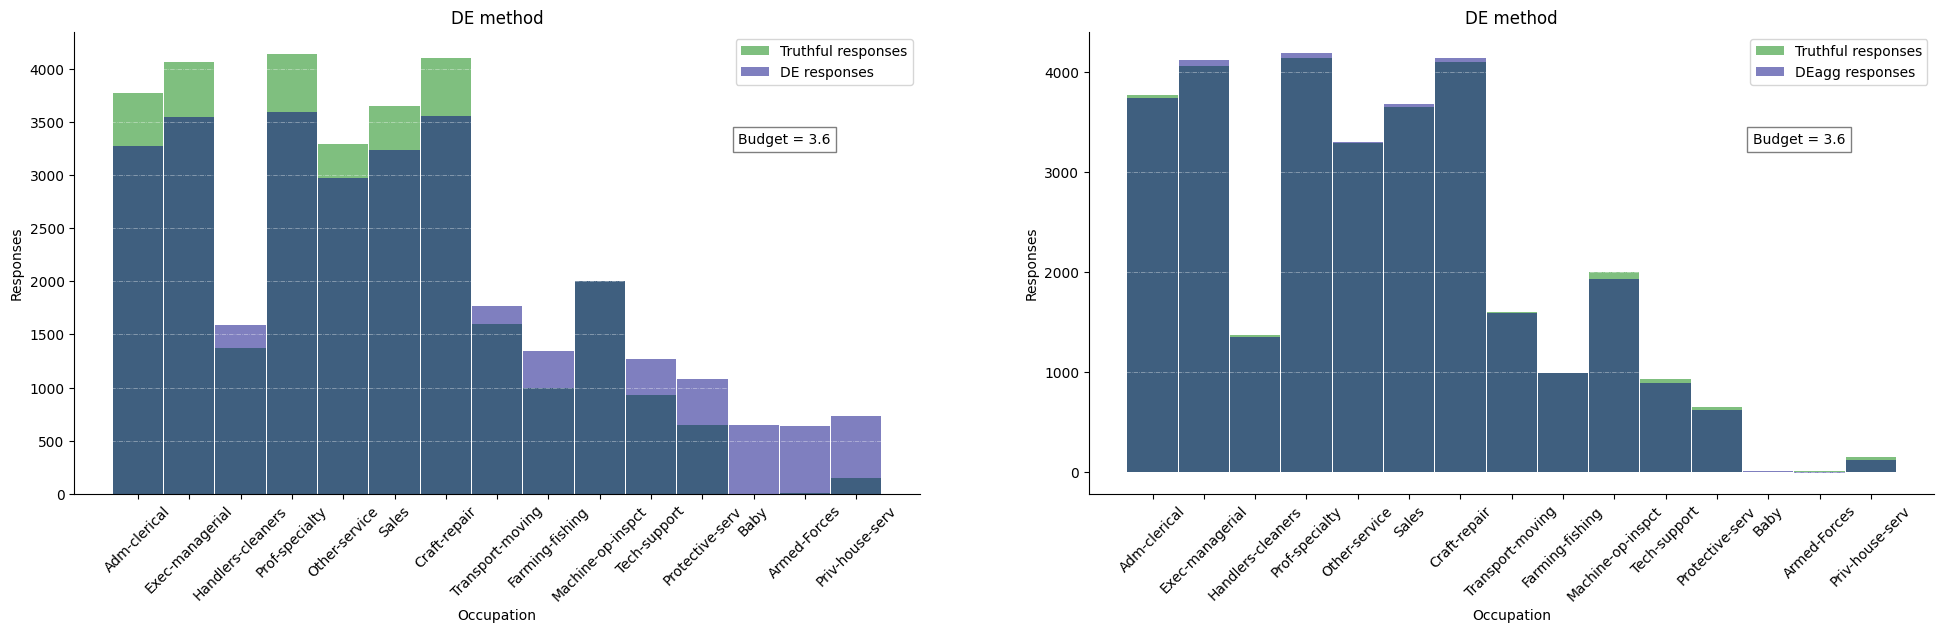

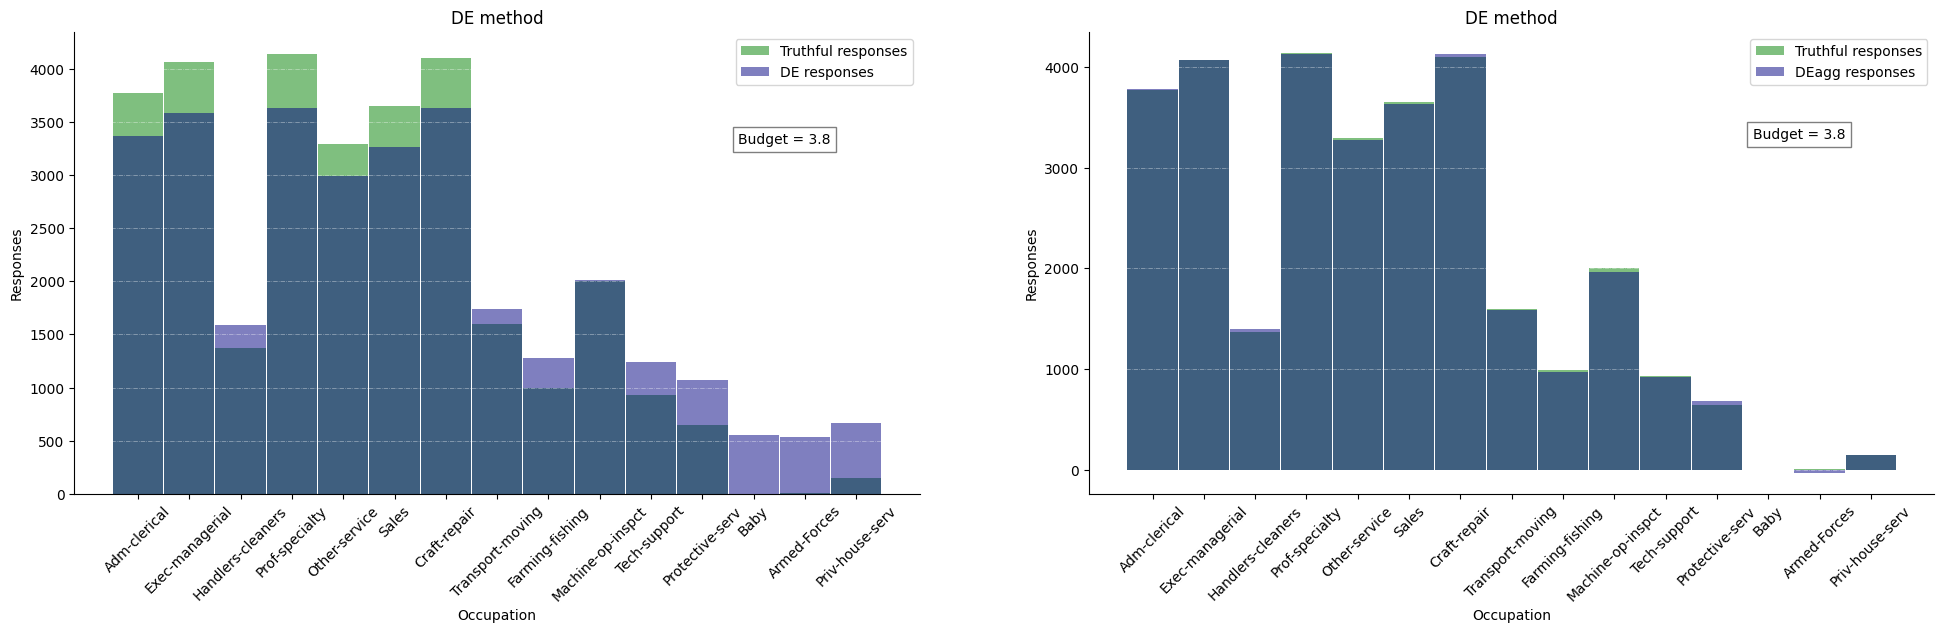

In [145]:
for i in range(1, 20, 1):
    histogramerDE('Occupation', i/5)